# KNN - Iris
Utilizando o algoritmo KNN para prever a qual espécie cada exemplo pertence

### Importações

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Lendo o dataset

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Criando uma coluna 'target' com valores numéricos para cada espécie

In [3]:
#Lista com cores para plotar matriz de scatter.
color_matrix = []
df['target'] = 0
for i in range(len(df)):
    if df['species'].iloc[i] == 'Iris-setosa':
        df['target'].iloc[i] = 0
        color_matrix.append('blue')
    elif df['species'].iloc[i] == 'Iris-versicolor':
        df['target'].iloc[i] = 1
        color_matrix.append('orange')
    else:
        df['target'].iloc[i] = 2
        color_matrix.append('green')

C:\Users\eduar\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
df

,petal_length,petal_width,species,target
0,1.4,0.2,Iris-setosa,0
1,1.4,0.2,Iris-setosa,0
2,1.3,0.2,Iris-setosa,0
3,1.5,0.2,Iris-setosa,0
4,1.4,0.2,Iris-setosa,0
...,...,...,...,...
145,5.2,2.3,Iris-virginica,2
146,5.0,1.9,Iris-virginica,2
147,5.2,2.0,Iris-virginica,2
148,5.4,2.3,Iris-virginica,2


### Plotando a quantidade que cada tipo de espécie aparece no dataset

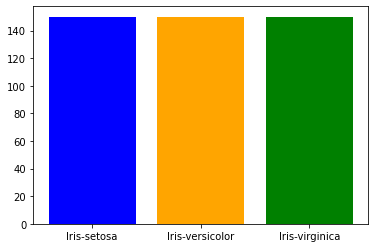

In [4]:
plt.bar(df['species'], df['species'].count(), color = ['orange', 'blue', 'green'])
plt.show()

### Scatter Matrix das Features

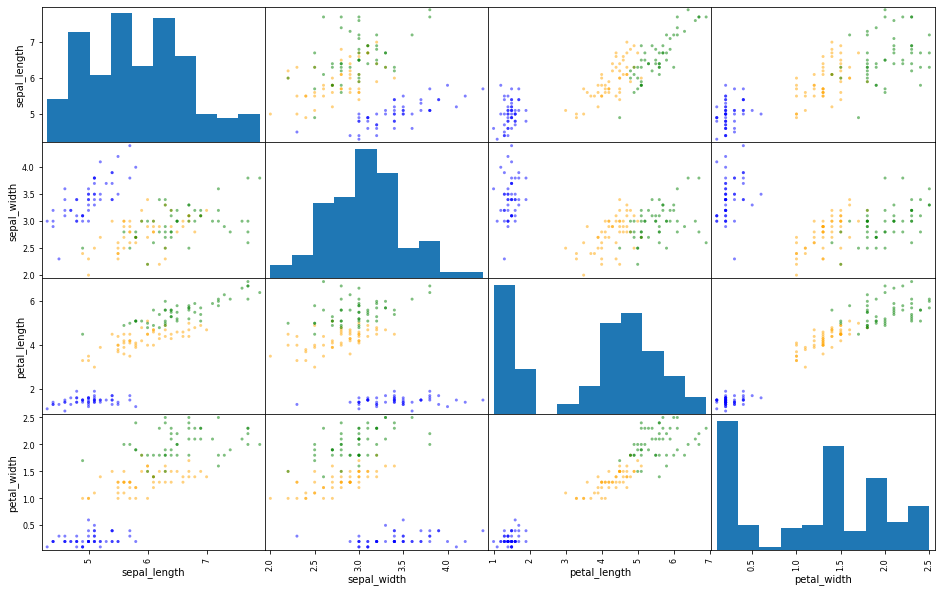

In [5]:
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pd.plotting.scatter_matrix(df[attributes], figsize=(16, 10), c=color_matrix)
plt.show()

Como estamos utilizando um algoritmo KNN, que se baseia na distância dos exemplos mais próximos para predizer a classe de um exemplo, vamos buscar um gráfico em que os atributos estão bem dispersos.

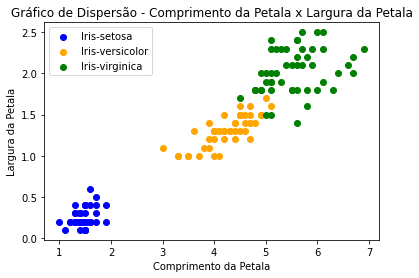

In [6]:
colors = ['blue', 'orange', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel('Comprimento da Petala')
plt.ylabel('Largura da Petala')
plt.title('Gráfico de Dispersão - Comprimento da Petala x Largura da Petala')
plt.legend()
plt.show()

Podemos evidenciar que em um gráfico de Largura da Petala x Comprimento da Petala, temos as classes bem definidas em cada local do gráfico.
Então vamos utilizar apenas esses dois atributos no nosso algoritmo KNN para prever em qual rótulo cada conjunto de atributos se encaixa.

### Retirando as colunas de sepal_length e sepal_width

In [7]:
df = df.drop(columns = ['sepal_length', 'sepal_width'])

### Dividindo o modelo em conjunto de treino e conjunto de teste

In [8]:
X = df.drop(columns = ['species', 'target'])
y = df['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=64)

### Criando e treinando o modelo KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

KNeighborsClassifier()

### Vendo os resultados com o Classification Report

In [10]:
y_pred = clf.predict(X_test)
y_true = y_test

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        50
      macro avg       0.96      0.97      0.96        50
   weighted avg       0.96      0.96      0.96        50



### Plotando uma Matriz de Confusão

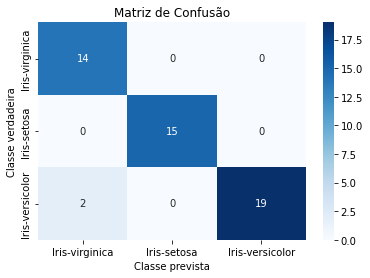

In [12]:
from sklearn.metrics import confusion_matrix
y_labels = list(set(y_train))
cm = confusion_matrix(y_true, y_pred, labels=y_labels)

#Criando o gráfico de calor com seaborn
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  

# Configurando os labels do gráfico
ax.set_xlabel('Classe prevista');ax.set_ylabel('Classe verdadeira');
ax.set_title('Matriz de Confusão');
ax.xaxis.set_ticklabels(y_labels); ax.yaxis.set_ticklabels(y_labels);

### Conclusões
Podemos ver que o modelo se saiu muito bem no geral, obtendo uma acurácia de 96%. A maior dificuldade que o nosso modelo encontrou foi na hora de predizer a classe "Versicolor", confundindo-se em duas ocasiões com a classe "Virginica".

Essa dificuldade já era esperada, tendo em vista que no gráfico de dispersão de "Tamanho da Petala x Comprimento da Petala", as classes "Versicolor" e "Virginica" ficam bem próximas em certos pontos.
